In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
# Suppress all warnings just to keep the notebook nice and clean. 
# This must happen after all imports since numpy actually adds its
# RankWarning class back in.
import warnings
warnings.filterwarnings("ignore")

# Setup the look and feel of the notebook
sns.set_context("notebook", 
                font_scale=1.5, 
                rc={"lines.linewidth": 2.5})
sns.set_style('whitegrid')
sns.set_palette('deep')

# Create a couple of colors to use throughout the notebook
red = sns.xkcd_rgb['vermillion']
blue = sns.xkcd_rgb['dark sky blue']

from IPython.display import display

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [6]:
def factorial(n):
    """Calculates the factorial of `n`
    """
    vals = list(range(1, n + 1))
    if len(vals) <= 0:
        return 1

    prod = 1
    for val in vals:
        prod *= val
        
    return prod
    
    
def n_choose_k(n, k):
    """Calculates the binomial coefficient
    """
    return factorial(n) / (factorial(k) * factorial(n - k))


def binom_prob(n, k, p):
    """Returns the probability of see `k` heads in `n` coin tosses
    
    Arguments:
    
    n - number of trials
    k - number of trials in which an event took place
    p - probability of an event happening
    
    """
    return n_choose_k(n, k) * p**k * (1 - p)**(n - k)

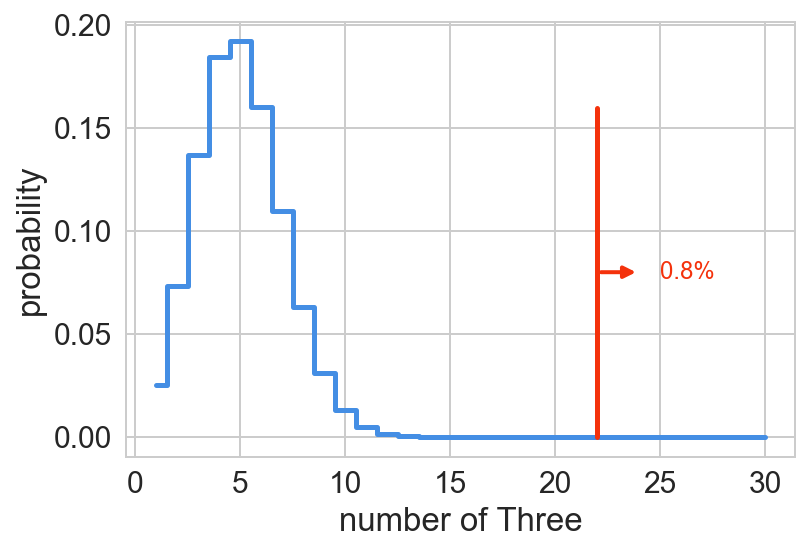

In [7]:
# Calculate the probability for every possible outcome of tossing 
# a fair coin 30 times.
probabilities = [binom_prob(30, k, .16666) for k in range(1, 31)]

# Plot the probability distribution using the probabilities list 
# we created above.
plt.step(range(1, 31), probabilities, where='mid', color=blue)
plt.xlabel('number of Three')
plt.ylabel('probability')
plt.plot((22, 22), (0, 0.1599), color=red);
plt.annotate('0.8%', 
             xytext=(25, 0.08), 
             xy=(22, 0.08), 
             multialignment='right',
             va='center',
             color=red,
             size='large',
             arrowprops={'arrowstyle': '<|-', 
                         'lw': 2, 
                         'color': red, 
                         'shrinkA': 10});

In [8]:
import pandas as pd

df = pd.DataFrame({'star':  [1, 1, 1, 1, 1, 1, 1, 1] + 
                            [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   'score': [84, 72, 57, 46, 63, 76, 99, 91] +
                            [81, 69, 74, 61, 56, 87, 69, 65, 66, 44, 62, 69]})
df

,score,star
0,84,1
1,72,1
2,57,1
3,46,1
4,63,1
5,76,1
6,99,1
7,91,1
8,81,0
9,69,0


In [11]:
df['label'] = df['star']

num_simulations = 5

differences = []
for i in range(num_simulations):
    np.random.shuffle(df['label'])
    print(df[['score','label']])

    score  label
0      84      0
1      72      0
2      57      0
3      46      1
4      63      1
5      76      1
6      99      0
7      91      0
8      81      0
9      69      1
10     74      0
11     61      0
12     56      1
13     87      1
14     69      1
15     65      0
16     66      0
17     44      0
18     62      0
19     69      1
    score  label
0      84      0
1      72      0
2      57      1
3      46      0
4      63      0
5      76      0
6      99      1
7      91      0
8      81      1
9      69      1
10     74      1
11     61      1
12     56      0
13     87      0
14     69      0
15     65      0
16     66      0
17     44      1
18     62      0
19     69      1
    score  label
0      84      1
1      72      0
2      57      0
3      46      0
4      63      0
5      76      1
6      99      1
7      91      0
8      81      0
9      69      0
10     74      0
11     61      0
12     56      0
13     87      0
14     69      1
15     65     

In [13]:
print(df[:,1])

TypeError: unhashable type: 'slice'